In [1]:
import pandas as pd
import numpy as np
import altair as alt
alt.data_transformers.enable('json')

from sublimpy import turbulence
import matplotlib.pyplot as plt
from sublimpy import tidy
import metpy.constants

# Open data

In [2]:
start_date = '20221130'
end_date = '20230509'
# open files
tidy_df_5Min = pd.read_parquet(f'../sos/tidy_df_{start_date}_{end_date}_noplanar_fit.parquet')
tidy_df_30Min = pd.read_parquet(f'../sos/tidy_df_30Min_{start_date}_{end_date}_noplanar_fit.parquet')
# convert time column to datetime
tidy_df_5Min['time'] = pd.to_datetime(tidy_df_5Min['time'])
tidy_df_30Min['time'] = pd.to_datetime(tidy_df_30Min['time'])
# limit data to our dates of interest, based on continuous snow cover at Kettle Ponds
tidy_df_5Min = tidy_df_5Min.set_index('time').sort_index().loc[start_date:end_date].reset_index()
tidy_df_30Min = tidy_df_30Min.set_index('time').sort_index().loc[start_date:end_date].reset_index()

# Check for outliers visually

<Axes: xlabel='time'>

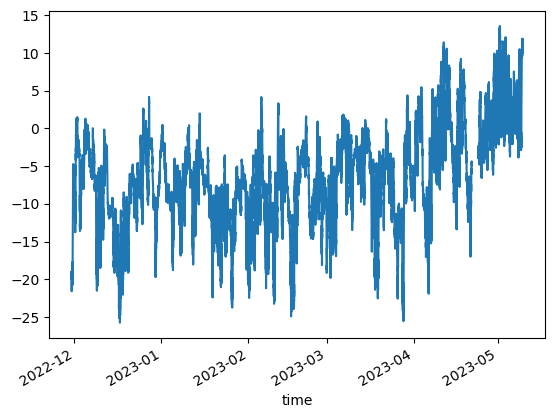

In [11]:
tidy_df_5Min.query("variable == 'T_3m_c'").set_index('time')['value'].plot()

# Check for outliers programmatically (5*$\sigma$)

Use 12 hour windows to calculate 5*sigma and see if there are any outliers 

In [13]:
values = tidy_df_5Min.query("variable == 'T_3m_c'").set_index('time')['value']

In [48]:
is_high_outlier = values > (values.mean() + 5*values.rolling(144).std())
is_low_outlier = values < (values.mean() - 5*values.rolling(144).std())
is_outlier = (is_low_outlier | is_high_outlier)


<Axes: xlabel='time'>

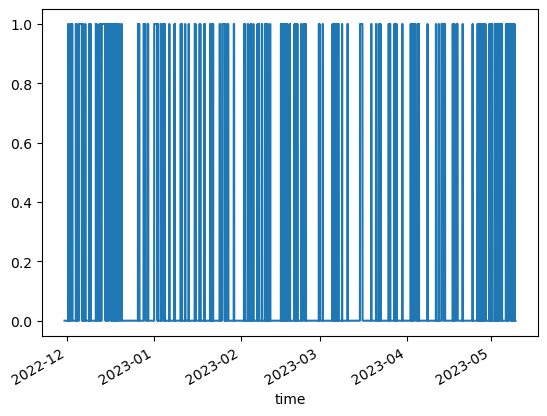

In [45]:
is_outlier.astype(int).plot()